Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 2
## april 2021. 

# Pavle Janevski 0055/2020

<font color='red'>
Preimenovati svesku u "domaci_zadatak_2_ime_prezime"<br></font>

# __Zadatak__: Van der Pol oscilator
Van der Pol-ova jednačina predstavlja nelinearnu diferencijalnu jednačinu drugog reda sličnu jednačini prigušenih oscilacija i ima formu:

\begin{equation}
    \frac{d^2x}{dt^2} + \mu(x^2 - 1)\frac{dx}{dt} + x = 0
\end{equation}

gde je $\mu$ parametar koji modeluje prigušenje (ujedno i "jačinu nelinearnosti" jednačine) i za koji važi da je $\mu \geq 0$. Istorijski jednačina opisuje napon u jednom nelinearnom električnom kolu koje je služilo kao oscilator u prvim radio aparatima. Osim domena elektronike, jednačina ima svoje primene i u laserskoj tehnici (laser je tip van der Pol-ovog oscilatora), biologiji (opisivanje električnog potencijala neurona), seizmologiji (prostiji modeli zemljotresa) itd.  

a) Formirati Python definiciju <font color='blue'>vanderpol</font> koja predstavlja datu diferencijalnu jednačinu i za pozivni parametar ima parametar $\mu$. Rešiti jednačinu na vremenskom domenu od $0$ do $30$ u $1000$ ekvidistantnih tačaka, za početne uslove $x(0) = 0.5$ i $dx/dt = 0$ i za četiri vrednosti parametra $\mu$, $\mu = 0.1, 2, 5, 10$. Prikazati zavisnosti $x(t)$ u okviru jednog $2\times 2$ subplot-a. Obeležiti ose svake ćelije grafika i nasloviti svaku ćeliju grafika. U naslovu je potrebno da stoji odgovarajuća vrednost parametra $\mu$. Na drugom $2\times 2$ subplot-u nacrtati fazne dijagrame $dx/dt$ u funkciji od $x$. Obeležiti ose svake ćelije grafika i nasloviti svaku ćeliju grafika. U naslovu je potrebno da stoji odgovarajuća vrednost parametra $\mu$.  

In [1]:
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import numpy as np

def vanderpol(y, t, mu):
    y1,y2 = y
    return [y2, - mu * (y1*y1 - 1)*y2 - y1]

t = np.linspace(0,30,1000)
mu_arr = [0.1,2,5,10]

q,axis1 = plt.subplots(2,2)
q1,axis2 = plt.subplots(2,2)
for i,mu in enumerate(mu_arr):
    sol = odeint(vanderpol, [0.5,0], t, args = (mu,))
    plot1 = axis1[int(i%2), int(i/2)]
    plot2 = axis2[int(i%2), int(i/2)]
    plot1.set_title(f'Zavisnost $x(t)$ ($\mu = {mu}$)')
    plot2.set_title(f'Zavisnost $dx/dt$ od $x$ ($\mu = {mu}$)')
    plot1.set_xlabel('Vreme $t$')
    plot2.set_xlabel('$x$')
    plot1.set_ylabel('$x$')
    plot2.set_ylabel('$dx/dt$')
    plot1.plot(t,sol[:,0])
    plot2.plot(sol[:,0], sol[:,1])
    plot2.plot(sol[:,0][0], sol[:,1][0], 'ro')
plt.show()

<Figure size 640x480 with 4 Axes>

<Figure size 640x480 with 4 Axes>

Komentarisati kako parametar $\mu$ utiče na dobijenu dinamiku. Kakve su oscilacije u slučaju malog "prigušenja", a kakve u slučaju velikog? Komentarisati oblike faznih dijagrama u zavisnosti od parametra $\mu$. U skladu sa datim početnim uslovima, za svaki od slučaja prepoznati početnu tačku faznog dijagrama i obeležiti je na grafiku markerom crvene boje. Komentarisati u kom smeru se iscrtava fazni dijagram. 

U slučaju male vrednosti parametra  𝜇  oscilacije imaju više oblik talasa dok se povećavanjem dešava da postaju strmiji, nalik digitalnim signalima,talasi su vise razdvojeni jedni od drugih. Fazni dijagram za male vrednosti  𝜇  prikazuje sličan grafik kao kada je u prigušenim oscilacijama alfa < omega. Smer iscrtavanja dijagrama je u svakom iznutra ka spolja.

b) Napisati Python definiciju <font color='blue'>maksimumi</font> koja pronalazi sve lokalne maksimume zavisnosti $x(t)$, odnosno vraća vrednosti maksimuma i vremenske trenutke u kojima se maksimumi dostižu. Primeniti funkciju na sva četiri rešenja iz prethodne tačke. Korišćenjem naredbe <font color='blue'>numpy.diff</font> kao i naredbe za srednju vrednost niza brojeva, za svaku vrednost parametra $\mu$ odrediti i ispisati period oscilacija kao srednju vrednost rastojanja između susedih maksimuma.  

In [2]:
def maksimumi(x,t):
    rx = []
    rt = []
    for i,x1 in enumerate(x):
        if i!=0 and i != len(x)-1 and x[i-1] < x1 and x[i+1] < x1:
            rx.append(x1)
            rt.append(t[i])
    return rx,rt

def period(mu):
    return np.mean(np.diff(maksimumi(np.transpose(odeint(vanderpol, [0.5, 0], t, args=(mu,)))[0], t)[1]))

for mu in mu_arr:
    print("mu = {0} period oscilacije {1}".format(mu,period(mu)))

mu = 0.1 period oscilacije 6.276276276276275
mu = 2 period oscilacije 7.6376376376376385
mu = 5 period oscilacije 11.606606606606608
mu = 10 period oscilacije 19.0990990990991


U ispisu prethodne skripte se nalaze odgovori.

c) Varirati parametar $\mu$ od $0.1$ do $15$ u $20$ tačaka i u svakoj tački izračunati period oscilacija. Nacrtati grafik zavisnosti perioda oscilacija $T$ od parametra $\mu$. Obeležiti ose grafika. Koristeći <font color='blue'>scipy.optimize.curve_fit</font> odrediti koeficijente koji definišu optimalnu pravu.  

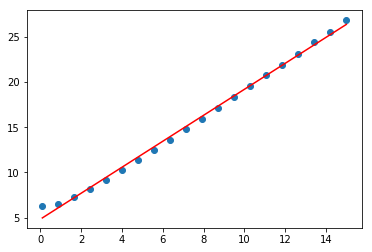

In [3]:
from scipy.optimize import curve_fit

def fit(x,a,b):
    return a*x + b

t = np.linspace(0,40,1000)
mu_arr = np.linspace(0.1,15,20)
periods = [period(mu) for mu in mu_arr]
optim, q = curve_fit(fit,mu_arr,periods)
a,b = optim
plt.scatter(mu_arr,periods)
plt.plot(mu_arr,mu_arr*a + b, color = 'red')
plt.show()

d) Umesto ugrađenih metoda, jednačinu rešiti primenom metode konačnih razlika. Ponoviti grafike iz tačke a) primenom ove metode. Na jednom $2\times 2$ subplot grafiku nacrtati rešenja $x(t)$ iz tačke a) kao i rešenja za $x(t)$ dobijena primenom FDM metode. Obeležiti ose svake ćelije grafika, uneti naslov svake ćelije, kao i legendu. Na drugom $2\times 2$ subplot grafiku nacrtati fazne dijagrame $dx/dt$ u funkciji $x$ iz tačke a) kao i fazne dijagrame dobijene primenom FDM metode. Obeležiti ose svake ćelije grafika, uneti naslov svake ćelije, kao i legendu. 

Pažljivo odabrati vremenski korak rešavanja i diskutovati izbor. Da li izbor vremenskog koraka zavisi od parametra $\mu$ i ako zavisi komentarisati zašto. 

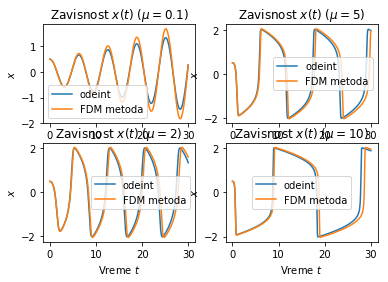

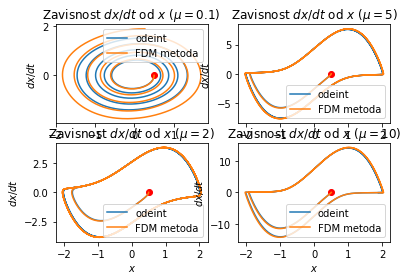

In [4]:
mu_arr = [0.1, 2, 5, 10]

q, axis1 = plt.subplots(2, 2)
q2, axis2 = plt.subplots(2, 2)

for i,mu in enumerate(mu_arr):
    t = np.linspace(0,30,int((mu+1)*1000))
    sol = odeint(vanderpol , [0.5,0], t,args = (mu,))
    plot1 = axis1[int(i % 2), int(i / 2)]
    plot2 = axis2[int(i % 2), int(i / 2)]
    plot1.set_title(f'Zavisnost $x(t)$ ($\mu = {mu}$)')
    plot2.set_title(f'Zavisnost $dx/dt$ od $x$ ($\mu = {mu}$)')
    plot1.set_xlabel('Vreme $t$')
    plot2.set_xlabel('$x$')
    plot1.set_ylabel('$x$')
    plot2.set_ylabel('$dx/dt$')
    plot1.plot(t, sol[:,0], label='odeint')
    plot2.plot(sol[:,0], sol[:,1], label='odeint')
    plot2.plot(sol[:,0][0], sol[:,1][0], 'ro')
    dt = t[1] - t[0]
    xarr = np.zeros(len(t))
    dxdtarr = np.zeros(len(t))
    xarr[0] = 0.5
    for i in range(1,len(t)):
        dxdt, d2xdt2 = vanderpol([xarr[i-1],dxdtarr[i-1]],t[i],mu)
        xarr[i] = xarr[i-1] + dxdt*dt
        dxdtarr[i] = dxdtarr[i-1] + d2xdt2*dt
    plot1.plot(t, xarr, label='FDM metoda')
    plot2.plot(xarr, dxdtarr, label='FDM metoda')
    plot1.legend()
    plot2.legend()
plt.show()

Sto je vece $\mu$ to je veca i greska, pa zbog toga metoda konacnih razlika mora da se radi u vise tacaka, odnosno da vremenski korak bude manji 